# Data science project

## Section 1

In [74]:
import pandas as pd
from pandas.core.frame import DataFrame

df = pd.DataFrame.from_csv('hotels_data.csv', sep=',',encoding='utf-8')

#### Render the data frame and save the result to 'Hotels_data_Changed.csv'

In [75]:
# Parse string columns to dateTime type
df['Snapshot Date'] = pd.to_datetime(df['Snapshot Date'])
df['Checkin Date'] = pd.to_datetime(df['Checkin Date'])

# Calculate day difference
df['DayDiff'] = (df['Checkin Date'] - df['Snapshot Date']).dt.days

# Add checkin day of week
df["DayWeek"] = df['Checkin Date'].dt.dayofweek

# Discount in dollars
df['DiscountDiff'] = df['Original Price'] - df['Discount Price']

# Discount in perecents
df['DiscountPerc'] = (df['DiscountDiff'] / df['Original Price']) * 100

df.to_csv('Hotels_data_Changed.csv',sep=',',encoding='utf-8')
df.head(5)

,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,DayWeek,DiscountDiff,DiscountPerc
Snapshot ID,,,,,,,,,,,,,
1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,2,138,11.714771
1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,2,131,11.769991
1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,3,130,2.974828
1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,6,72,4.140311
1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,2,67,3.852789


## Section 2

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame.from_csv('Hotels_data_Changed.csv', sep=',',encoding='utf-8')

C:\Users\Daniel Yochpaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys


#### Render data frame for Classification

In [2]:
currentColumns = ['Hotel Name', 'DayDiff', 'Checkin Date', 'Snapshot Date', 'DayWeek','Discount Code','DiscountPerc']
featuColumns = currentColumns[0:5]

df = df[currentColumns]
df.sort_values(['DiscountPerc'], ascending=False, inplace=True)
df.drop_duplicates(subset=featuColumns, keep='first', inplace=True)
df.dropna()

df.to_csv('Hotels_data_Changed2.csv',sep=',',encoding='utf-8')

label_encoder = LabelEncoder()
x = df.drop(['Discount Code'],axis=1)
x['Hotel Name'] = label_encoder.fit_transform(x['Hotel Name'])
x['Snapshot Date'] = label_encoder.fit_transform(x['Snapshot Date'])
x['Checkin Date'] = label_encoder.fit_transform(x['Checkin Date'])
y = df['Discount Code']

#### Split data to 70% train and 30% test

In [6]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

### Decision Tree

In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train);
treePredictions = dtree.predict(x_test);

#### Results analysis

        Predicted 1  Predicted 2  Predicted 3  Predicted 4
True 1         6230          783          500          356
True 2          676         8367          814          403
True 3          538          892         7043          405
True 4          363          394          428         3998

Accuracy: 0.7964585274930103
True positive: [6230 8367 7043 3998]
False positive:
Predicted 1    1577
Predicted 2    2069
Predicted 3    1742
Predicted 4    1164
dtype: int64


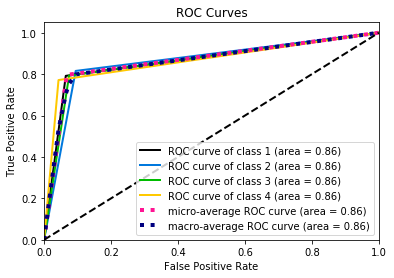

In [9]:
dtMatrix=pd.DataFrame(
    confusion_matrix(y_test, treePredictions),
    columns=['Predicted 1', 'Predicted 2','Predicted 3','Predicted 4'],
    index=['True 1', 'True 2','True 3','True 4']
)
print(dtMatrix)
print()
print ("Accuracy: %s" %metrics.accuracy_score(y_test, treePredictions ))
print("True positive: %s" %np.diag(dtMatrix))
print("False positive:\n%s" %(dtMatrix.sum(axis=0)-np.diag(dtMatrix)))
skplt.metrics.plot_roc_curve(y_test, dtree.predict_proba(x_test))
plt.show()

### Naive Base prediction

In [63]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nbPredictions = nb.predict(x_test)

#### Results analysis

        Predicted 1  Predicted 2  Predicted 3  Predicted 4
True 1         7007         3895          790            0
True 2         5533         4939          542            0
True 3         2970         2884          840            0
True 4         1403         1056          331            0

Accuracy: 0.397204100652
True positive: [7007 4939  840    0]
False positive:
Predicted 1    9906
Predicted 2    7835
Predicted 3    1663
Predicted 4       0
dtype: int64


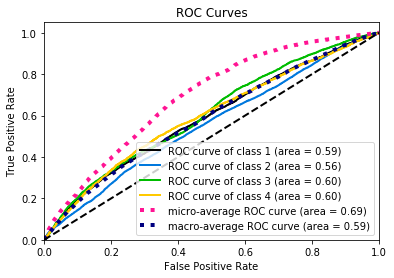

In [64]:
nbMatrix=pd.DataFrame(
    confusion_matrix(y_test,nbPredictions ),
    columns=['Predicted 1', 'Predicted 2','Predicted 3','Predicted 4'],
    index=['True 1', 'True 2','True 3','True 4']
)
print(nbMatrix)
print()
print ("Accuracy: %s" %metrics.accuracy_score(y_test, nbPredictions))
print("True positive: %s" %np.diag(nbMatrix))
print("False positive:\n%s" %(nbMatrix.sum(axis=0)-np.diag(nbMatrix)))
skplt.metrics.plot_roc_curve(y_test, nb.predict_proba(x_test))
plt.show()

## Section 3

#### Group by hotel name and take top 150 by count

In [65]:
df = pd.DataFrame.from_csv('Hotels_data_Changed.csv', sep=',',encoding='utf-8')
groupByHotels = df.groupby(['Hotel Name']).size().sort_values(ascending=False).head(150)
groupByHotels.head(5)

Hotel Name
Newark Liberty International Airport Marriott                   5346
Hilton Garden Inn Times Square                                  4892
Residence Inn Newark Elizabeth Liberty International Airport    4314
Westin New York at Times Square                                 3792
Loews Regency New York Hotel                                    3617
dtype: int64

#### Find top 40 checkin dates order by records count (high to low)

In [66]:
checkins = df.loc[df['Hotel Name'].isin(groupByHotels.index)].groupby(['Checkin Date']).size().sort_values(ascending=False).head(40)
checkins = checkins.index.values
checkins[:5]

array(['2015-11-11', '2015-10-14', '2015-11-04', '2015-08-19', '2015-10-28'], dtype=object)

#### For each hotel show top 40 checkin dates compare to 'Discount Code'

In [67]:
hotelsCheckinCodes = pd.DataFrame()
hotelsCheckinCodes['Hotel Name'] = groupByHotels.index

#Create date and code columns
for c in checkins:
        hotelsCheckinCodes['(1) ' + c] = -1
        hotelsCheckinCodes['(2) ' + c] = -1
        hotelsCheckinCodes['(3) ' + c] = -1
        hotelsCheckinCodes['(4) ' + c] = -1
        
#Help function - find the min price for the accept hotel,checkin date and code
def minPrice(hotelName,checkinDate,code):
    records = df[(df['Hotel Name'] == hotelName) & (df['Checkin Date'] == checkinDate) & (df['Discount Code'] == code)].sort_values(['Discount Price'],ascending=True)
    if records.empty == False:
        return records.iloc[0]['Discount Price']
    else:
        return -1

#for each hotel set the min price
for i,row in hotelsCheckinCodes.iterrows():
    for ck in checkins:
        hotelsCheckinCodes.set_value(i,'(1) ' + ck, minPrice(row['Hotel Name'], ck, 1))
        hotelsCheckinCodes.set_value(i,'(2) ' + ck, minPrice(row['Hotel Name'], ck, 2))
        hotelsCheckinCodes.set_value(i,'(3) ' + ck, minPrice(row['Hotel Name'], ck, 3))
        hotelsCheckinCodes.set_value(i,'(4) ' + ck, minPrice(row['Hotel Name'], ck, 4))

hotelsCheckinCodes.to_csv('Hotel_Checkin_Code.csv',sep=',',encoding='utf-8')
hotelsCheckinCodes.head(5)

,Hotel Name,(1) 2015-11-11,(2) 2015-11-11,(3) 2015-11-11,(4) 2015-11-11,(1) 2015-10-14,(2) 2015-10-14,(3) 2015-10-14,(4) 2015-10-14,(1) 2015-11-04,...,(3) 2015-11-03,(4) 2015-11-03,(1) 2015-08-13,(2) 2015-08-13,(3) 2015-08-13,(4) 2015-08-13,(1) 2015-11-25,(2) 2015-11-25,(3) 2015-11-25,(4) 2015-11-25
0,Newark Liberty International Airport Marriott,838,906,1008,-1,804,863,965,-1,796,...,932,1034,-1,1076,846,795,-1,-1,-1,-1
1,Hilton Garden Inn Times Square,1195,1185,1134,1144,1715,1645,1535,1662,1195,...,1629,-1,1240,1183,1146,1212,-1,-1,-1,1266
2,Residence Inn Newark Elizabeth Liberty Interna...,688,717,769,-1,871,-1,1070,-1,696,...,701,753,-1,-1,884,925,635,635,635,683
3,Westin New York at Times Square,1532,1586,1631,1681,1356,1426,1475,1965,1336,...,1882,-1,-1,1285,-1,1261,1106,1168,1181,1172
4,Loews Regency New York Hotel,2276,2276,2316,2316,3295,3015,3085,3345,2195,...,2316,2716,1595,1595,-1,-1,2145,2036,2045,2116


#### Normalizes the prices to a number between 0 - 100

In [68]:
hotelsCheckinCodes = pd.DataFrame.from_csv('Hotel_Checkin_Code.csv', sep=',',encoding='utf-8')

#Change -1 to None
nullable = hotelsCheckinCodes.drop(['Hotel Name'],axis=1).apply(lambda column:column.apply(lambda x: None if x == -1 else x))

maxP = nullable.max().max()
minP = nullable.min().min()
diff = maxP-minP

normalDf = hotelsCheckinCodes.drop(['Hotel Name'],axis=1).apply(lambda column:column.apply(lambda x: x if x == -1 else int(round(((x-minP)/diff)*100))))
normalDf.insert(0, 'Hotel Name', hotelsCheckinCodes['Hotel Name'])
normalDf.head(5)

,Hotel Name,(1) 2015-11-11,(2) 2015-11-11,(3) 2015-11-11,(4) 2015-11-11,(1) 2015-10-14,(2) 2015-10-14,(3) 2015-10-14,(4) 2015-10-14,(1) 2015-11-04,...,(3) 2015-11-03,(4) 2015-11-03,(1) 2015-08-13,(2) 2015-08-13,(3) 2015-08-13,(4) 2015-08-13,(1) 2015-11-25,(2) 2015-11-25,(3) 2015-11-25,(4) 2015-11-25
0,Newark Liberty International Airport Marriott,6,6,8,-1,5,6,7,-1,5,...,7,8,-1,8,6,5,-1,-1,-1,-1
1,Hilton Garden Inn Times Square,10,10,9,9,16,15,14,15,10,...,15,-1,10,10,9,10,-1,-1,-1,10
2,Residence Inn Newark Elizabeth Liberty Interna...,4,4,5,-1,6,-1,8,-1,4,...,4,5,-1,-1,6,7,3,3,3,4
3,Westin New York at Times Square,13,14,15,15,11,12,13,18,11,...,17,-1,-1,11,-1,10,9,9,10,9
4,Loews Regency New York Hotel,22,22,22,22,33,30,31,34,21,...,22,27,14,14,-1,-1,20,19,19,20


#### Hierarchical Clustering

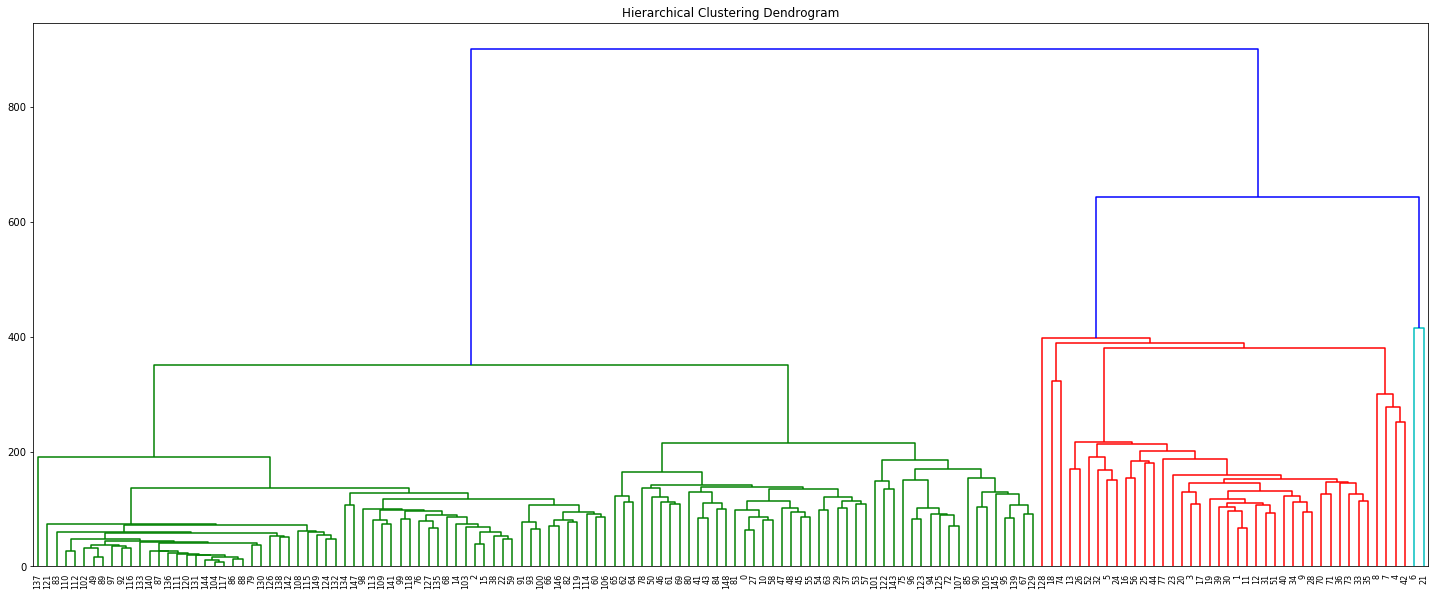

In [69]:
from scipy.cluster.hierarchy import dendrogram,linkage

Z = linkage(normalDf.drop(['Hotel Name'],axis=1), 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8.)
plt.show()